In [126]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
data = np.genfromtxt('xor_training_data.csv', delimiter=',')

In [312]:
x = np.delete(data, 2, 1)
x

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [313]:
y = np.delete(data, [0,1], 1)
y

array([[0.],
       [1.],
       [1.],
       [0.]])

In [349]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,), use_bias=True, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, use_bias=True, activation='linear'))
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.2,
    momentum=0.0,
    nesterov=True,
    amsgrad=False)

#optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

In [350]:
N=1000
history = model.fit(x, y, verbose=0, epochs=N)

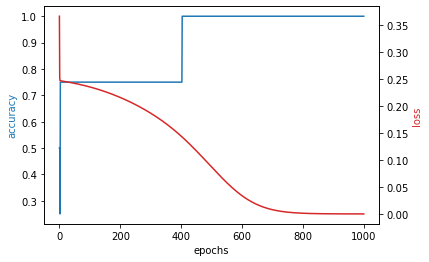

In [351]:
loss = history.history['loss']
acc = history.history['accuracy']
xdata = history.epoch

fig, ax1 = plt.subplots()
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='tab:blue')
ax1.plot(xdata, acc, color='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('loss', color='tab:red')
ax2.plot(xdata, loss, color='tab:red')

In [352]:
[model.predict(np.array([[0,0]])),
model.predict(np.array([[1,0]])),
model.predict(np.array([[0,1]])),
model.predict(np.array([[1,1]]))]

1/1 [==============================] - 0s 30ms/step


[array([[0.00322104]], dtype=float32),
 array([[0.995644]], dtype=float32),
 array([[0.9956281]], dtype=float32),
 array([[0.0059849]], dtype=float32)]

In [353]:
model.weights

[<tf.Variable 'dense_122/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[3.3526595, 1.5603905],
        [3.2260647, 1.528648 ]], dtype=float32)>,
 <tf.Variable 'dense_122/bias:0' shape=(2,) dtype=float32, numpy=array([-0.60085356, -2.1890118 ], dtype=float32)>,
 <tf.Variable 'dense_123/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 3.046617 ],
        [-3.2073975]], dtype=float32)>,
 <tf.Variable 'dense_123/bias:0' shape=(1,) dtype=float32, numpy=array([-0.75261533], dtype=float32)>]

In [354]:
x_range = np.linspace(-2, 2, 30)
y_range = np.linspace(-2, 2, 30)
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
# for i in range(30):
#     for j in range(30):
#         print(xx[i,j], yy[i,j])
zz = [model.predict(np.array([[xx[i][j], yy[i,j]] for i in range(30)]), verbose=0).flatten() for j in range(30)]
z = np.array(zz)
z

array([[-0.7533573 , -0.7535343 , -0.7537531 , -0.75402343, -0.75435686,
        -0.75476766, -0.75527275, -0.7558923 , -0.7566496 , -0.75757146,
        -0.75868714, -0.7600271 , -0.7616196 , -0.76348484, -0.7656241 ,
        -0.76800156, -0.7705139 , -0.77294034, -0.7748626 , -0.7755385 ,
        -0.7737077 , -0.7673035 , -0.7530509 , -0.72596073, -0.67883253,
        -0.6020954 , -0.48468268, -0.3169592 , -0.0962767 ,  0.16649073],
       [-0.7535304 , -0.7537483 , -0.7540174 , -0.7543495 , -0.7547587 ,
        -0.75526184, -0.75587904, -0.7566337 , -0.7575525 , -0.7586649 ,
        -0.76000154, -0.76159114, -0.7634546 , -0.7655946 , -0.76797765,
        -0.77050436, -0.7729603 , -0.77493745, -0.7757098 , -0.7740425 ,
        -0.7679072 , -0.7540849 , -0.7276626 , -0.68153226, -0.6062083 ,
        -0.4906456 , -0.3250714 , -0.10645151,  0.15494025,  0.43274164],
       [-0.7537434 , -0.75401145, -0.75434226, -0.7547498 , -0.75525093,
        -0.7558658 , -0.7566178 , -0.7575336 , -0

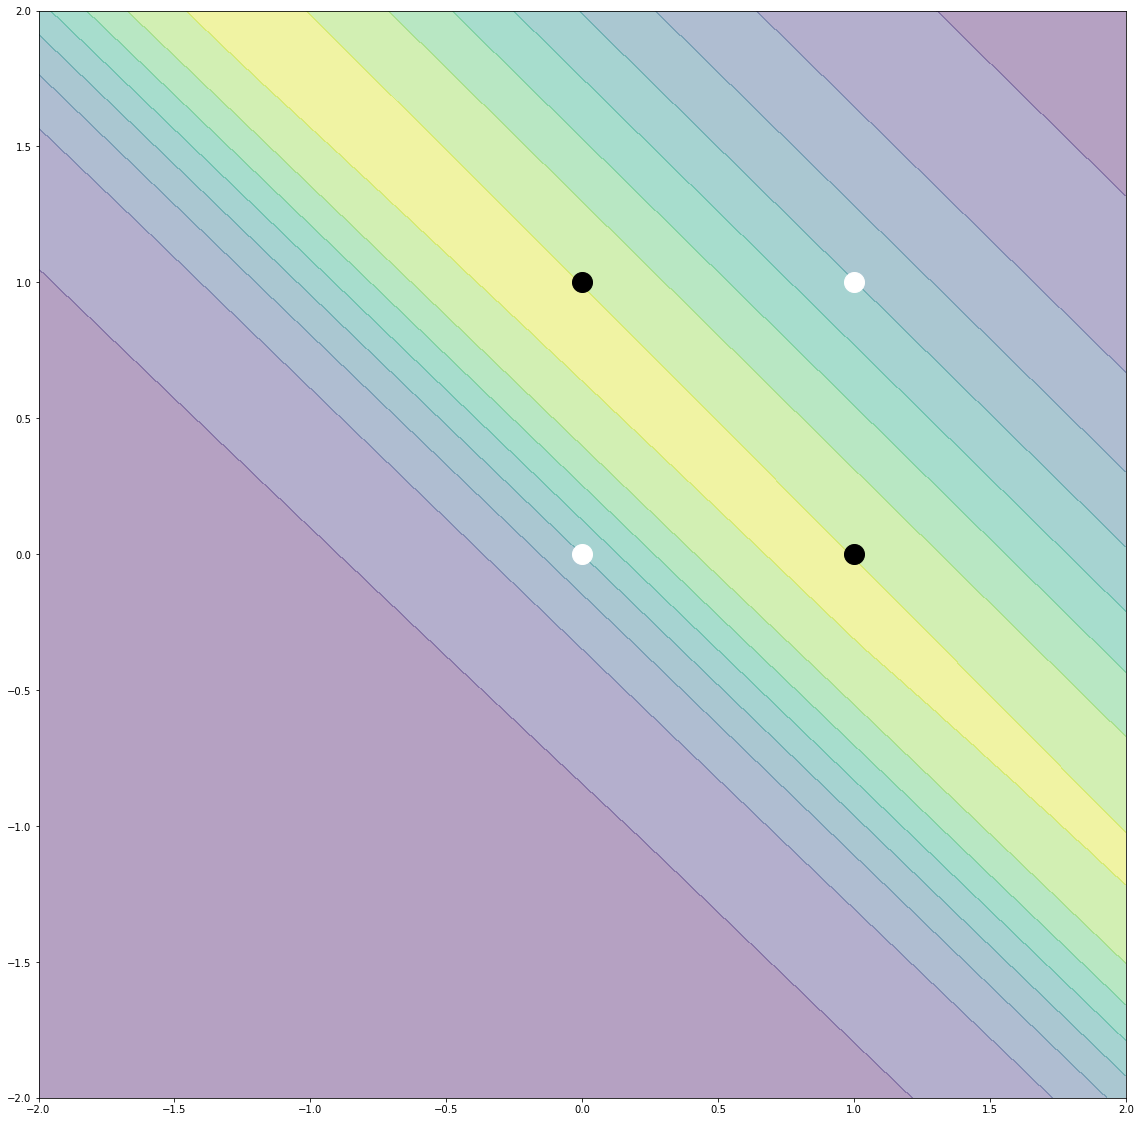

In [356]:
plt.figure(figsize=(20, 20))
plt.axis('scaled')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
colors = {0: "wo", 1: "ko"}
# plotting the four datapoints
for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[int(y[i][0])], markersize=20)

# using the contourf function to create the plot
plt.contourf(xx, yy, z, alpha=0.4)